In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('E:/DS_and_ML/datasets/emotion.csv')

In [2]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [3]:
df["Emotion"].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [4]:
for i in range(len(df)):
    if df['Emotion'][i] == 'anger' or df['Emotion'][i] == 'fear' or df['Emotion'][i] == 'love' or df['Emotion'][i] == 'surprise':
        df = df.drop(i,axis=0)

In [5]:
df['labels'] = df["Emotion"].apply(lambda x: 1 if x == 'happy' else 0)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['labels'], test_size=0.3, random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

lst = X_train.tolist()
vectorizer = TfidfVectorizer(input = lst, lowercase = True, stop_words = "english")
train_transformed = vectorizer.fit_transform(X_train)
test_transformed = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(train_transformed, y_train)

MultinomialNB()

In [8]:
prediction = model.predict(test_transformed)
actual = y_test

print("Prediction:", list(prediction))
print("Actual:    ",list(actual))

Prediction: [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [9]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(prediction, actual)
print(matrix)
precision = matrix[1][1]/(matrix[1][1]+matrix[0][1])
recall = matrix[1][1]/(matrix[1][1]+matrix[1][0])
f1score = matrix[1][1]/(matrix[1][1]+(matrix[1][0]+(matrix[0][1]/2)))

print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1score)

[[1717   84]
 [ 123 2065]]
Precision: 0.9609120521172638
Recall: 0.9437842778793418
f1_score: 0.9260089686098655


In [39]:
message = ['What the fuck!',
           'This is hell!',
           'Wow so cool!',
           'Go to hell',
           'A new baby is born',
          'Iam really sad to hear these words from you!']

message_transformed = vectorizer.transform(message)
real_prediction = model.predict(message_transformed)

for i in range(len(real_prediction)):
    if real_prediction[i] == 0:
        print("Sadness overloaded!")
    else:
        print("Happy and joy!")
        
        

Sadness overloaded!
Sadness overloaded!
Happy and joy!
Sadness overloaded!
Happy and joy!
Sadness overloaded!


In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, train_transformed, y_train, cv=3)

In [49]:
roc_auc_score(y_train, y_scores)

0.9406773872371956

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [56]:
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr, label="ROC curve"):
    plt.plot(fpr, tpr,'b--')
    plt.plot([0,1],[0,1],'g--')

Matplotlib is building the font cache; this may take a moment.


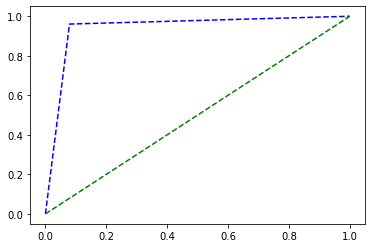

In [57]:
plot_roc(fpr, tpr)


In [58]:
tpr

array([0.        , 0.96045082, 1.        ])

In [59]:
fpr

array([0.        , 0.07909605, 1.        ])